In [1]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (12, 6)
x = np.linspace(0, 10, 101)

In [2]:
temp = pd.read_csv('TG_STAID002759.txt', delimiter=',',skiprows=19)

In [3]:
temp.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [4]:
temp.columns = ['id', 'date', 'temp', 'quality']

In [5]:
temp['id'].nunique()

3

In [6]:
temp['quality'].value_counts()

0    53099
9      195
1        1
Name: quality, dtype: int64

In [7]:
temp.isna().sum()

id         0
date       0
temp       0
quality    0
dtype: int64

In [8]:
temp['date'] = temp['date'].astype(str)
temp['date'] = pd.to_datetime(temp['date'])


In [9]:
temp.set_index("date", inplace=True)

In [10]:
data = temp.loc['2000':'2021']

In [11]:
data.head()

,id,temp,quality
date,,,
2000-01-01,111448,14,0
2000-01-02,111448,39,0
2000-01-03,111448,59,0
2000-01-04,111448,53,0
2000-01-05,111448,30,0


In [12]:
data['temp_c'] = data['temp']*0.1

/tmp/ipykernel_6606/3679858369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp_c'] = data['temp']*0.1


In [13]:
data.drop(['id', 'quality', 'temp'], axis=1, inplace=True)
data.head()

/home/xrusa/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,temp_c
date,
2000-01-01,1.4
2000-01-02,3.9
2000-01-03,5.9
2000-01-04,5.3
2000-01-05,3.0


In [14]:
data_train = data.loc[:'2020']
data_test = data.loc['2021']

In [15]:
data_train.to_csv("temp_train.csv")
data_test.to_csv("temp_test.csv")

In [16]:
data['timestep'] = list(range(len(data)))

/tmp/ipykernel_6606/511925172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestep'] = list(range(len(data)))


In [17]:
X= data[['timestep']]
y = data['temp_c']

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression()

<AxesSubplot:xlabel='date', ylabel='temp_c'>

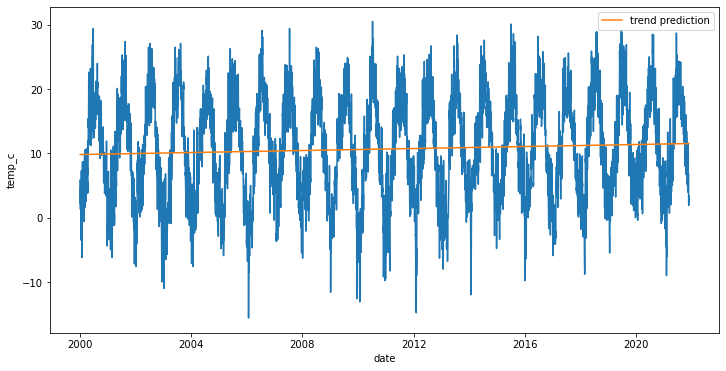

In [20]:
sns.lineplot(data=data.temp_c)
sns.lineplot(x=data.index, y=model.predict(X), label='trend prediction')

In [21]:
data['trend'] = model.predict(X)

/tmp/ipykernel_6606/3296746077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trend'] = model.predict(X)


In [22]:
data['month_name'] = data.index.month_name()

/tmp/ipykernel_6606/856636295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_name'] = data.index.month_name()


In [23]:
data['month_name'] = data['month_name'].astype(str)
data['month_name'] = data['month_name'].astype(object)

/tmp/ipykernel_6606/2829531645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_name'] = data['month_name'].astype(str)
/tmp/ipykernel_6606/2829531645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_name'] = data['month_name'].astype(object)


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8005 entries, 2000-01-01 to 2021-11-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_c      8005 non-null   float64
 1   timestep    8005 non-null   int64  
 2   trend       8005 non-null   float64
 3   month_name  8005 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 570.7+ KB


In [25]:
data = pd.get_dummies(data,
                      prefix='',
                      prefix_sep='',
                      drop_first=True)


In [26]:
data.head()

,temp_c,timestep,trend,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,
2000-01-01,1.4,0,9.811018,0,0,0,1,0,0,0,0,0,0,0
2000-01-02,3.9,1,9.811231,0,0,0,1,0,0,0,0,0,0,0
2000-01-03,5.9,2,9.811444,0,0,0,1,0,0,0,0,0,0,0
2000-01-04,5.3,3,9.811657,0,0,0,1,0,0,0,0,0,0,0
2000-01-05,3.0,4,9.811870,0,0,0,1,0,0,0,0,0,0,0


In [27]:
X = data.drop(columns=['temp_c', 'trend'])
y = data['temp_c']

In [28]:
model.fit(X, y)

LinearRegression()

In [29]:
model.score(X, y)

0.7599878686858185

<AxesSubplot:xlabel='date', ylabel='temp_c'>

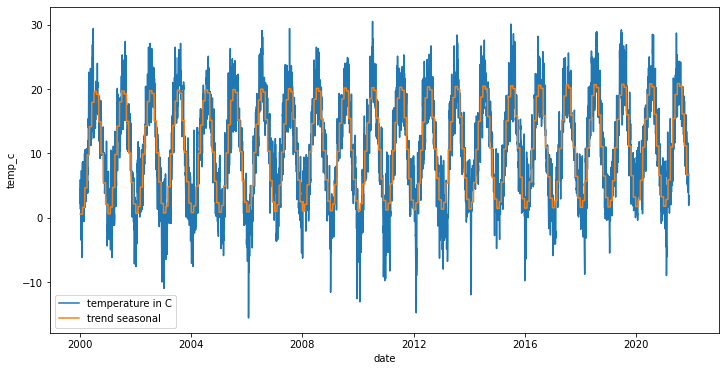

In [30]:
sns.lineplot(data=data.temp_c, label = 'temperature in C')
sns.lineplot(x=data.index, y=model.predict(X), label='trend seasonal')

In [31]:
data['trend_seasonal'] = model.predict(X)

In [32]:
data['remainder'] = data['temp_c'] - data['trend_seasonal']

<AxesSubplot:xlabel='date', ylabel='remainder'>

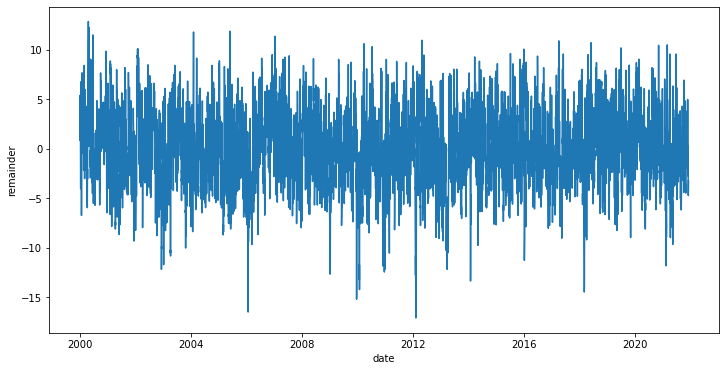

In [33]:
sns.lineplot(data=data.remainder)

In [34]:
data['remainder'].to_csv('remainder_temp.csv')

In [37]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp_c  7671 non-null   float64
dtypes: float64(1)
memory usage: 119.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2021-01-01 to 2021-11-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp_c  334 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB
